In [1]:
# Author : Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'


# Figure S1 STD SSTa and uwinda changes

In [3]:
# These files are created by the scripts "create_file_std_ssta_uasa_CMIP6.ipynb" 
# and "create_file_std_ssta_uasa_CMIP5.ipynb"

## UASa ##

uasa_atl4_hist_cmip6 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP6.nc')
uasa_atl4_ssp5_cmip6 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP6.nc')

uasa_atl4_hist_cmip5 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP5.nc')
uasa_atl4_ssp5_cmip5 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP5.nc')


## SSTa ##


ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')


# Compute SST and wind variability

In [4]:
## std SSTa in JJA ##

std_ssta_atl3_hist_cmip5_jja = ssta_atl3_hist_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip5_jja = ssta_atl3_ssp5_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month'])).std(dim='time')


std_ssta_atl3_hist_cmip6_jja = ssta_atl3_hist_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip6_jja = ssta_atl3_ssp5_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month'])).std(dim='time')

## std UASa in MJJ ##


std_uasa_atl4_hist_cmip5_mjj = uasa_atl4_hist_cmip5.uasa.sel(time=is_mjj(
    uasa_atl4_hist_cmip5['time.month'])).std(dim='time')

std_uasa_atl4_ssp5_cmip5_mjj = uasa_atl4_ssp5_cmip5.uasa.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip5['time.month'])).std(dim='time')


std_uasa_atl4_hist_cmip6_mjj = uasa_atl4_hist_cmip6.uasa.sel(time=is_mjj(
    uasa_atl4_hist_cmip6['time.month'])).std(dim='time')

std_uasa_atl4_ssp5_cmip6_mjj = uasa_atl4_ssp5_cmip6.uasa.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip6['time.month'])).std(dim='time')

# Make ensemble means 

In [5]:
std_ssta_atl3_ssp5_cmip6_jja_ensmean = std_ssta_atl3_ssp5_cmip6_jja.mean(dim='model')
std_ssta_atl3_hist_cmip6_jja_ensmean = std_ssta_atl3_hist_cmip6_jja.mean(dim='model')


std_ssta_atl3_ssp5_cmip5_jja_ensmean = std_ssta_atl3_ssp5_cmip5_jja.mean(dim='model')
std_ssta_atl3_hist_cmip5_jja_ensmean = std_ssta_atl3_hist_cmip5_jja.mean(dim='model')

In [6]:
std_uasa_atl4_ssp5_cmip6_mjj_ensmean = std_uasa_atl4_ssp5_cmip6_mjj.mean(dim='model')
std_uasa_atl4_hist_cmip6_mjj_ensmean = std_uasa_atl4_hist_cmip6_mjj.mean(dim='model')


std_uasa_atl4_ssp5_cmip5_mjj_ensmean = std_uasa_atl4_ssp5_cmip5_mjj.mean(dim='model')
std_uasa_atl4_hist_cmip5_mjj_ensmean = std_uasa_atl4_hist_cmip5_mjj.mean(dim='model')

# Make changes 2050-2099 minus 1950-1999

In [7]:


std_ssta_ensmean_cmip6 = std_ssta_atl3_ssp5_cmip6_jja_ensmean - std_ssta_atl3_hist_cmip6_jja_ensmean
std_uasa_ensmean_cmip6 = std_uasa_atl4_ssp5_cmip6_mjj_ensmean - std_uasa_atl4_hist_cmip6_mjj_ensmean


std_ssta_ensmean_cmip5 = std_ssta_atl3_ssp5_cmip5_jja_ensmean - std_ssta_atl3_hist_cmip5_jja_ensmean
std_uasa_ensmean_cmip5 = std_uasa_atl4_ssp5_cmip5_mjj_ensmean - std_uasa_atl4_hist_cmip5_mjj_ensmean

In [8]:
std_ssta_atl3_change_jja_cmip5 =std_ssta_atl3_ssp5_cmip5_jja - std_ssta_atl3_hist_cmip5_jja
std_uasa_atl4_change_mjj_cmip5 = std_uasa_atl4_ssp5_cmip5_mjj - std_uasa_atl4_hist_cmip5_mjj


std_ssta_atl3_change_jja_cmip6 =std_ssta_atl3_ssp5_cmip6_jja- std_ssta_atl3_hist_cmip6_jja
std_uasa_atl4_change_mjj_cmip6 = std_uasa_atl4_ssp5_cmip6_mjj - std_uasa_atl4_hist_cmip6_mjj

# Make regression 

In [9]:
std_ssta_combined_jja = np.hstack([std_ssta_atl3_change_jja_cmip6.values,
                              std_ssta_atl3_change_jja_cmip5.values])
std_uasa_combined_mjj = np.hstack([std_uasa_atl4_change_mjj_cmip6.values,
                              std_uasa_atl4_change_mjj_cmip5.values])

In [10]:
alpha0, interp0, r0, p_value0, std0 = stats.linregress(std_uasa_combined_mjj,std_ssta_combined_jja)

## Make resampling

In [11]:
x0 = np.arange(-0.7,0.4,0.1)
y0 = x0*alpha0 + interp0
n_replicate = 10000
N = std_uasa_combined_mjj.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(std_uasa_combined_mjj[ind_resample],
                                   std_ssta_combined_jja[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x0[:, np.newaxis] + result[:, 1]
ci_forecast_uasa_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [12]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts0 = tinv(0.05, len(x0)-2)

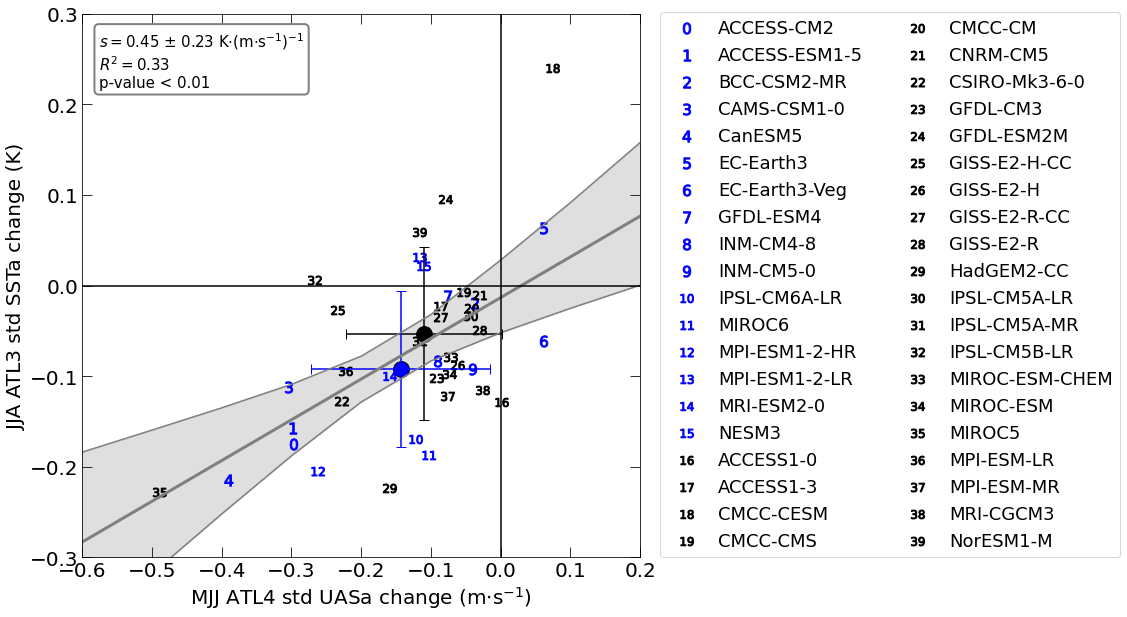

In [13]:
f,ax = plt.subplots(1,1,figsize=[10,10])
x0 = np.arange(-0.7,0.4,0.1)
y0 = x0*alpha0 + interp0
m_cmip6 = np.arange(0,std_ssta_atl3_hist_cmip6_jja.shape[0],1)
m_cmip5 = np.arange(std_ssta_atl3_hist_cmip6_jja.shape[0],
                    std_ssta_atl3_hist_cmip6_jja.shape[0] + 
                    std_ssta_atl3_change_jja_cmip5.shape[0],1)
ax.plot(x0,y0,linewidth=3,color='grey')

ax.plot(x0, ci_forecast_uasa_ssta[0], 'grey')
ax.plot(x0, ci_forecast_uasa_ssta[1], 'grey')
ax.fill_between(x0,y0,ci_forecast_uasa_ssta[0],color='grey',alpha=0.25)
ax.fill_between(x0,y0,ci_forecast_uasa_ssta[1],color='grey',alpha=0.25)



ftz=20

ax.scatter(std_uasa_ensmean_cmip6,std_ssta_ensmean_cmip6,color='blue',s=250,
           edgecolors='black')

ax.scatter(std_uasa_ensmean_cmip5,std_ssta_ensmean_cmip5,color='black',s=250,
           edgecolors='black')

for i in range(std_ssta_atl3_hist_cmip6_jja.model.shape[0]):
    if i<10:
        ax.scatter(std_uasa_atl4_change_mjj_cmip6[i],std_ssta_atl3_change_jja_cmip6[i],color='blue',
              marker=r"$ {} $".format(m_cmip6[i]),s=130,
                   label=std_ssta_atl3_change_jja_cmip6.model.values[i])
    else:
        ax.scatter(std_uasa_atl4_change_mjj_cmip6[i],std_ssta_atl3_change_jja_cmip6[i],color='blue',
              marker=r"$ {} $".format(m_cmip6[i]),s=200,label=std_ssta_atl3_change_jja_cmip6.model.values[i])

for k in range(std_ssta_atl3_hist_cmip5_jja.model.shape[0]):
    ax.scatter(std_uasa_atl4_change_mjj_cmip5[k],std_ssta_atl3_change_jja_cmip5[k],color='black',
              marker=r"$ {} $".format(m_cmip5[k]),s=200,label=std_ssta_atl3_change_jja_cmip5.model.values[k])
    
ax.set_xlabel('MJJ ATL4 std UASa change (m$\cdot$s$^{-1}$)',fontsize=ftz)
ax.set_ylabel('JJA ATL3 std SSTa change (K)',fontsize=ftz)
ax.tick_params(labelsize=ftz)
ax.set_xlim([-0.6,0.2])
ax.set_ylim([-0.3,0.3])

ax.axhline(0,color='black')
ax.axvline(0,color='black')


ax.errorbar(std_uasa_atl4_change_mjj_cmip5.mean(dim='model'),
              std_ssta_atl3_change_jja_cmip5.mean(dim='model'),
             xerr=std_uasa_atl4_change_mjj_cmip5.std(dim='model'),
             yerr=std_ssta_atl3_change_jja_cmip5.std(dim='model'),color='black',fmt='o',capsize=5)


ax.errorbar(std_uasa_atl4_change_mjj_cmip6.mean(dim='model'),
              std_ssta_atl3_change_jja_cmip6.mean(dim='model'),
             xerr=std_uasa_atl4_change_mjj_cmip6.std(dim='model'),
             yerr=std_ssta_atl3_change_jja_cmip6.std(dim='model'),color='blue',fmt='o',capsize=5)

#ax.text(std_uasa_atl4_change_mjj_cmip5.mean(dim='model'),
#         0.3,
#         str(np.round(std_uasa_atl4_change_mjj_cmip5.mean(dim='model').values,2)),
#         fontsize=ftz-5,
#         verticalalignment='top')
#

textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.2f K$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$' %
                     (alpha0, std0*ts0),
                     r'$R^{2}=%.2f$' % (r0**2, ),
                    'p-value < 0.01'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2)

# place a text box in upper left in axes coords
ax.text(0.03,
         0.97,
         textstr,
         transform=ax.transAxes,
         fontsize=ftz-5,
         verticalalignment='top',
         bbox=props)
ax.legend(bbox_to_anchor=(1.02, 1.02),ncol=2, loc="upper left",fontsize=ftz-2)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

plt.savefig(path_fig + 'figure_1_review.png',
             dpi = 300,
            bbox_inches='tight')